

*  **Stavros Gazetas 2883**
*   **Sofianos Lampropoulos 2810**



In [ ]:
## We import the apropriate libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
##Data extraction and insertion
!unzip /content/drive/My\ Drive/Colab\ Notebooks/Deep\ Learning\ Project/compressed_dataset.csv.zip

Archive:  /content/drive/My Drive/Colab Notebooks/Deep Learning Project/compressed_dataset.csv.zip
replace compressed_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: compressed_dataset.csv  y

replace __MACOSX/._compressed_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename:   inflating: __MACOSX/._compressed_dataset.csv  


In [ ]:
##Data extraction and insertion GIA STAVRO
!unzip /content/drive/MyDrive/compressed_dataset.csv.zip

Archive:  /content/drive/MyDrive/compressed_dataset.csv.zip
  inflating: compressed_dataset.csv  
  inflating: __MACOSX/._compressed_dataset.csv  


In [ ]:
df = pd.read_csv('compressed_dataset.csv')

In [ ]:
df.head()

,Unnamed: 0,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,19,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,40,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,55,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,78,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0


In [ ]:
df = df.drop(['Unnamed: 0'],axis = 1)

In [ ]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0


#QoE (Quality of Event Calculation)

In [ ]:

from datetime import datetime
events = df.groupby('event_id')

QoE = []



for i in events.groups.keys():

  event = df[df['event_id'] == i]
  if len(event) == 1: 
    QoE.append(event['qoe'].values[0])

  else : 

    T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)

    
    #minutes = event['timestamp'] - event['timestamp'].min()
    
    
    
    minutes = (event.loc[:,"timestamp"] - event.loc[:,"timestamp"].min())*1.67*10**(-5)
    event['minute'] = minutes + 1
    event = event.astype({'minute':'int'})


    QoE.append((sum(event.groupby('minute')['qoe'].mean()))/T)



print(QoE)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.9898307155269392, 0.9939397838883275, 0.9708654051047224, 0.9890344001755703, 0.9929258962163682, 0.995231774160073, 0.9575874860637894, 0.9977206687009723, 0.9932033536820202, 0.9918860211469844, 0.973790499976554, 0.9771912902654577, 0.9556675471279371, 0.9971498520279553, 0.9836842610209564, 0.9970969734140418, 0.9694631537864055, 0.9922274397542594, 0.9404014232352434, 0.985619451634887, 0.9969651750077508, 0.9949763506789103, 0.9818262581068921, 0.9923130907362009, 0.9932335564760421, 0.9884358542272319, 0.9713876466267124, 0.9735655755352158, 0.9942113578097429, 0.8974084696749807, 0.9885627120687713, 0.9888696488474072, 0.9933993714169018, 0.98474415109101, 0.9900438872040852, 0.9932886143969673, 0.9800445959639477, 0.9902959137278301, 0.9913163032415706, 0.9744096325692828, 0.9880442339000638, 0.985490184177821, 0.9583797848828998, 0.9991090419242595, 0.9636060255092472, 0.9838468507823845, 0.9918049802264357, 0.9121696483627284, 0.9887149663373531, 0.9875826110509451, 0.983

In [ ]:
df['QoE'] = 0


for i in range(len(QoE)):
  df.loc[df['event_id'] == i,'QoE'] = QoE[i]

# Engagement Calculation

In [ ]:
events = df.groupby('event_id')

Eng = []



for i in events.groups.keys():

  event = df[df['event_id'] == i]
  if len(event) == 1: 
    Eng.append(event['engagement'].values[0])

  else : 

    T = round((event['timestamp'].max() - event['timestamp'].min())*1.67*10**(-5) + 0.5)

    
    #minutes = event['timestamp'] - event['timestamp'].min()
    
    
    
    minutes = (event.loc[:,"timestamp"] - event.loc[:,"timestamp"].min())*1.67*10**(-5)
    event['minute'] = minutes + 1
    event = event.astype({'minute':'int'})


    Eng.append((sum(event.groupby('minute')['engagement'].mean()))/T)



print(Eng)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


[0.39042382306353557, 0.3915022369068112, 0.5566815367478187, 0.29627941904446115, 0.6101636931918093, 0.27888414500632863, 0.003058702127264825, 0.27580601106001346, 0.3970141445325005, 0.619410287239867, 0.47383669641993353, 0.5248326518374774, 0.6103722543758952, 0.5393270301887845, 0.3836519667918955, 0.4709083757805907, 0.3291657327153804, 0.6556625656123442, 0.35871281226569246, 0.5250402065350165, 0.47805765459254207, 0.5912835783690314, 0.5159216967369591, 0.6337397145106202, 0.28026539187820726, 0.33232321894083644, 0.6060151537066176, 0.43304349580592233, 0.493511175783146, 0.5260768526666643, 0.34530185116935946, 0.586712680191525, 0.30569758941588204, 0.5011593151028448, 0.5351166262256729, 0.527723947673459, 0.5609579150781798, 0.4139969939666746, 0.2927111180497497, 0.335296591655639, 0.48845329703271634, 0.5354280129599289, 0.45803544548438513, 0.44852015698379705, 0.3539539284413576, 0.48828702846100264, 0.5331229620679114, 0.6294411283961915, 0.5281203892522237, 0.4987

In [ ]:
df['Eng'] = 0


for i in range(len(Eng)):
  df.loc[df['event_id'] == i,'Eng'] = Eng[i]

In [ ]:
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,QoE,Eng
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,WFO,0.999976,0.0,785,0.995236,0.488534
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,WFH,0.281964,0.9,3895,0.995236,0.488534
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,WFH,1.000000,0.9,0,0.995236,0.488534
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,WFH,0.999988,0.0,466,0.995236,0.488534
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,WFO,1.000000,0.0,0,0.995236,0.488534


In [ ]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

df['viewer_type'] = LabelEncoder().fit_transform(df['viewer_type'])

In [ ]:
#check dataframe 
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,QoE,Eng
0,1632762065906,5.0,107.0,11661.0,2.0,3.0,1,0.999976,0.0,785,0.995236,0.488534
1,1632762104254,5.0,107.0,12810.0,2.0,3.0,0,0.281964,0.9,3895,0.995236,0.488534
2,1632762108299,5.0,107.0,15129.0,19.0,3.0,0,1.000000,0.9,0,0.995236,0.488534
3,1632762112510,5.0,107.0,5860.0,217.0,3.0,0,0.999988,0.0,466,0.995236,0.488534
4,1632762129231,5.0,107.0,4483.0,2.0,3.0,1,1.000000,0.0,0,0.995236,0.488534


In [ ]:
#check the details of numerical data
df.describe()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,qoe,engagement,buffer_ms,QoE,Eng
count,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07,2.061537e+07
mean,1.640338e+12,7.808620e+00,1.053845e+02,2.816832e+04,4.112114e+02,5.073638e+00,9.841420e-01,4.395985e-01,1.018180e+02,9.822440e-01,4.363785e-01
std,4.586312e+09,7.097981e+00,1.282433e+02,2.618064e+04,1.016404e+03,7.884355e+00,9.820005e-02,4.461667e-01,8.002422e+03,2.328330e-02,1.282601e-01
min,1.632762e+12,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.636522e+12,1.000000e+00,9.000000e+00,6.475000e+03,3.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,9.771913e-01,3.802747e-01
50%,1.639503e+12,6.000000e+00,5.300000e+01,1.975200e+04,3.100000e+01,3.000000e+00,1.000000e+00,1.000000e-01,0.000000e+00,9.898307e-01,4.444335e-01
75%,1.644830e+12,1.300000e+01,1.560000e+02,4.373500e+04,2.410000e+02,6.000000e+00,1.000000e+00,9.000000e-01,0.000000e+00,9.939398e-01,5.260769e-01
max,1.647873e+12,3.200000e+01,7.330000e+02,1.089730e+05,8.242000e+03,1.230000e+02,1.000000e+00,1.000000e+00,1.037696e+07,9.999999e-01,9.502376e-01


In [ ]:
# setting timestamp name as index column
df.set_index(pd.to_datetime(df['timestamp'], unit='ms'), inplace = True)
 
# display
df.head()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,QoE,Eng
timestamp,,,,,,,,,,,,
2021-09-27 17:01:05.906,1632762065906,5.0,107.0,11661.0,2.0,3.0,1,0.999976,0.0,785,0.995236,0.488534
2021-09-27 17:01:44.254,1632762104254,5.0,107.0,12810.0,2.0,3.0,0,0.281964,0.9,3895,0.995236,0.488534
2021-09-27 17:01:48.299,1632762108299,5.0,107.0,15129.0,19.0,3.0,0,1.000000,0.9,0,0.995236,0.488534
2021-09-27 17:01:52.510,1632762112510,5.0,107.0,5860.0,217.0,3.0,0,0.999988,0.0,466,0.995236,0.488534
2021-09-27 17:02:09.231,1632762129231,5.0,107.0,4483.0,2.0,3.0,1,1.000000,0.0,0,0.995236,0.488534


In [ ]:
df['day'] = pd.to_datetime(df['timestamp'], unit='ms').dt.strftime('%Y-%m-%d')

In [ ]:
df['day']

timestamp
2021-09-27 17:01:05.906    2021-09-27
2021-09-27 17:01:44.254    2021-09-27
2021-09-27 17:01:48.299    2021-09-27
2021-09-27 17:01:52.510    2021-09-27
2021-09-27 17:02:09.231    2021-09-27
                              ...    
2022-03-21 14:17:44.309    2022-03-21
2022-03-21 14:17:56.879    2022-03-21
2022-03-21 14:18:08.293    2022-03-21
2022-03-21 14:18:08.564    2022-03-21
2022-03-21 14:18:54.266    2022-03-21
Name: day, Length: 20615370, dtype: object

## Data Cleaning 

In [ ]:
df.corr()

,timestamp,customer_id,event_id,viewer_id,city_id,country_id,viewer_type,qoe,engagement,buffer_ms,QoE,Eng
timestamp,1.000000,-0.118878,-0.094138,0.017065,-0.020120,-0.098899,0.130358,0.012069,-0.050806,0.000833,0.054463,-0.176964
customer_id,-0.118878,1.000000,0.396116,0.181726,0.182576,0.280668,-0.183205,0.000502,0.011260,0.002461,-0.043383,0.035337
event_id,-0.094138,0.396116,1.000000,0.175456,0.140753,0.198886,-0.167785,-0.005911,-0.014718,0.001953,-0.081384,-0.053270
viewer_id,0.017065,0.181726,0.175456,1.000000,0.105359,0.183503,-0.038834,-0.055236,-0.034059,0.011303,-0.131319,-0.111877
city_id,-0.020120,0.182576,0.140753,0.105359,1.000000,0.150240,-0.249043,-0.011115,0.000837,0.001879,-0.029705,0.027952
country_id,-0.098899,0.280668,0.198886,0.183503,0.150240,1.000000,-0.149777,-0.062678,0.045406,0.003015,-0.152027,0.137999
viewer_type,0.130358,-0.183205,-0.167785,-0.038834,-0.249043,-0.149777,1.000000,-0.010102,-0.030059,-0.000058,0.017843,-0.090434
qoe,0.012069,0.000502,-0.005911,-0.055236,-0.011115,-0.062678,-0.010102,1.000000,-0.001385,-0.041635,0.190700,-0.003923
engagement,-0.050806,0.011260,-0.014718,-0.034059,0.000837,0.045406,-0.030059,-0.001385,1.000000,-0.000567,0.002075,0.287710
buffer_ms,0.000833,0.002461,0.001953,0.011303,0.001879,0.003015,-0.000058,-0.041635,-0.000567,1.000000,-0.009591,-0.000554


In [ ]:
##Handle Missing Values

#We print null counts by column

df.isnull().sum()


timestamp      0
customer_id    0
event_id       0
viewer_id      0
city_id        0
country_id     0
viewer_type    0
qoe            0
engagement     0
buffer_ms      0
QoE            0
day            0
Eng            0
dtype: int64

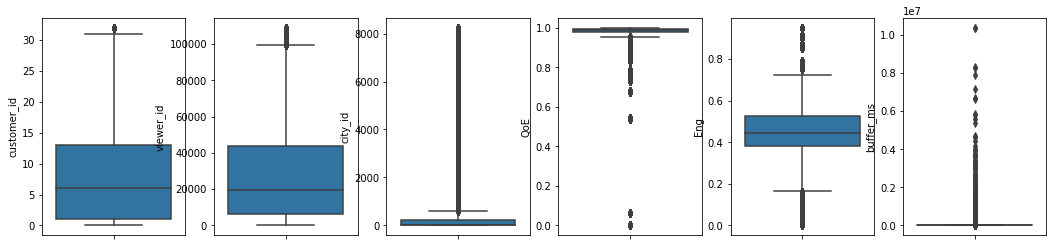

In [ ]:
# We draw box plots for some  variables () with continuous values = OUTLIERS???
cols = ['customer_id', 'viewer_id', 'city_id', 'QoE', 'Eng', 'buffer_ms']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,6,i)
    sns.boxplot(y=col, data=df)
    i+=1


In [ ]:
from scipy.special import kl_div

customers = []

for i in range(33):
  if(i == 0):
    customers.append(i)

  else :   
    found = False
    for j in customers:
      pk = df.loc[df['customer_id'] == i, 'QoE'].unique()
      qk = df.loc[df['customer_id'] == j, 'QoE'].unique()
    
      if(len(pk) > len(qk)):
        pk = np.random.choice(pk,len(qk))

      elif(len(qk) > len(pk)):
        qk = np.random.choice(qk,len(pk))

      s = sum(kl_div(pk,qk))

      if(s < 0.017):
        found = True
        
    if(found == False) :
      customers.append(i)

print(customers)

[0, 1, 4, 7, 14, 15, 23, 27, 28, 30, 31]


In [ ]:
customers = [0, 1, 4, 7, 14, 15, 23, 27, 28, 30, 31]

In [ ]:
final_df = df.copy(deep=True)

for i in range(33):
  if(i in customers):
    continue
  else:
    final_df.drop(final_df[final_df['customer_id'] == i].index, axis = 0, inplace = True)

In [ ]:
final_df['customer_id'].unique()

array([21.,  7., 28., 15., 23., 27., 26.,  4., 31.,  1.,  0.])

In [ ]:
df['customer_id'].unique()

array([ 5., 32., 16., 14.,  8., 10., 21.,  7., 17., 11., 24., 28., 25.,
       15.,  2., 20.,  3.,  9., 12., 30., 22., 23., 29., 27., 26.,  4.,
       19., 18., 31.,  1.,  0., 13.,  6.])

# QoE for each customer over month

Text(0, 0.5, 'QoE for each customer ')

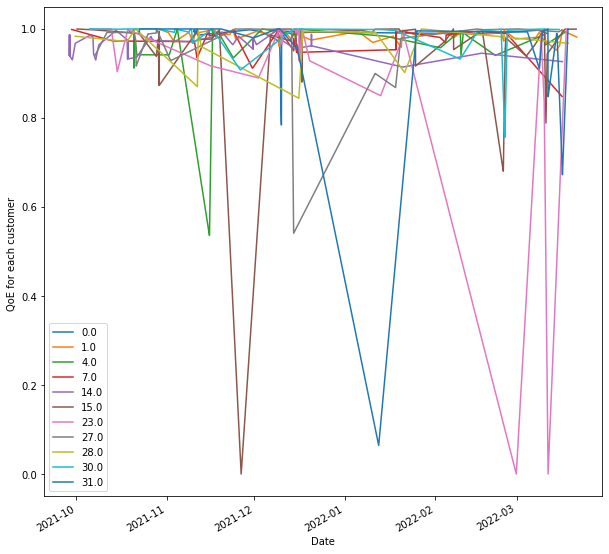

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
final_df.groupby('customer_id')['QoE'].plot(ax = ax, legend=True)
ax.set_xlabel('Date')
ax.set_ylabel('QoE for each customer ')

# Buffering severity over time (month) for each customer

In [ ]:
##QoE Discretizing
from sklearn.preprocessing import KBinsDiscretizer
df['qoe_level'] = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform').fit_transform(df[['QoE']])

In [ ]:
df['qoe_level'].unique()

array([4., 2., 3., 0.])

Text(0.5, 1.0, 'Bad QoE Buffering Severity')

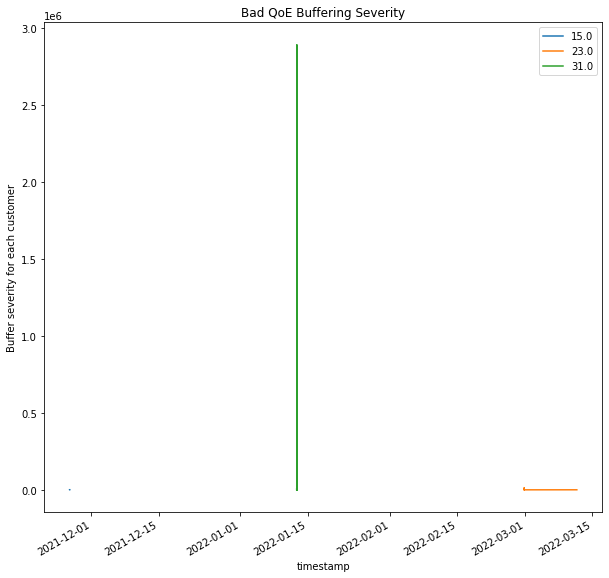

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
df[df['qoe_level'] == 0 ].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer')
ax.set_title('Bad QoE Buffering Severity')

Text(0.5, 1.0, 'Poor QoE Buffering Severity')

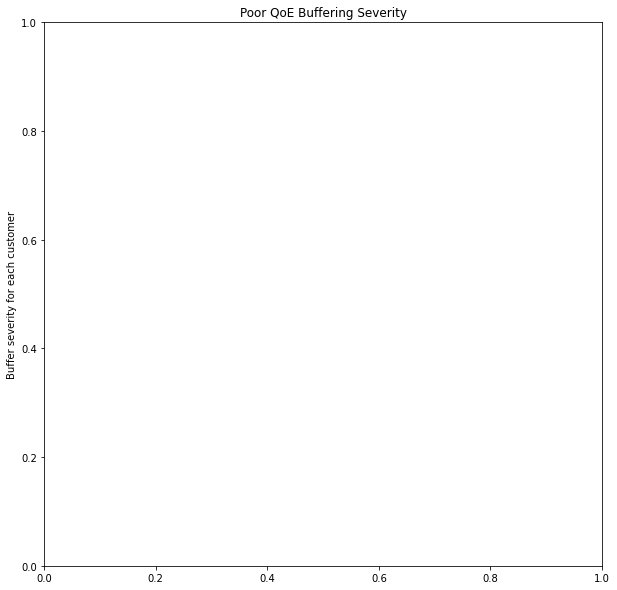

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
df[df['qoe_level'] == 1].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer')
ax.set_title('Poor QoE Buffering Severity')

Text(0.5, 1.0, 'Average QoE Buffering Severity')

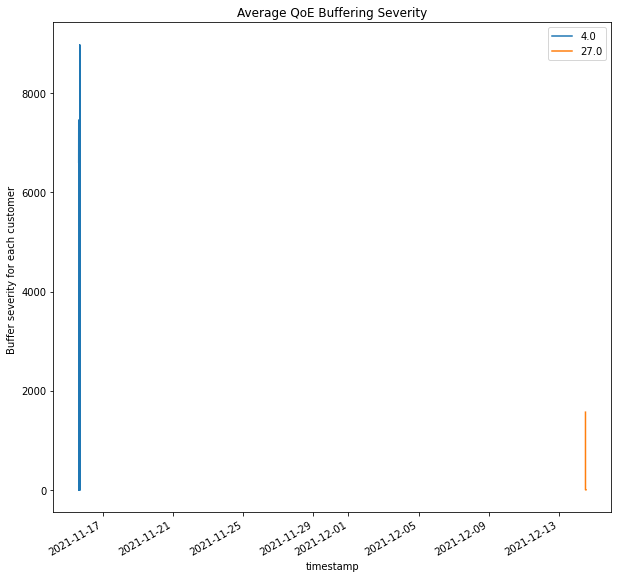

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
df[df['qoe_level'] == 2 ].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer ')
ax.set_title('Average QoE Buffering Severity')

Text(0.5, 1.0, 'Good QoE Buffering Severity')

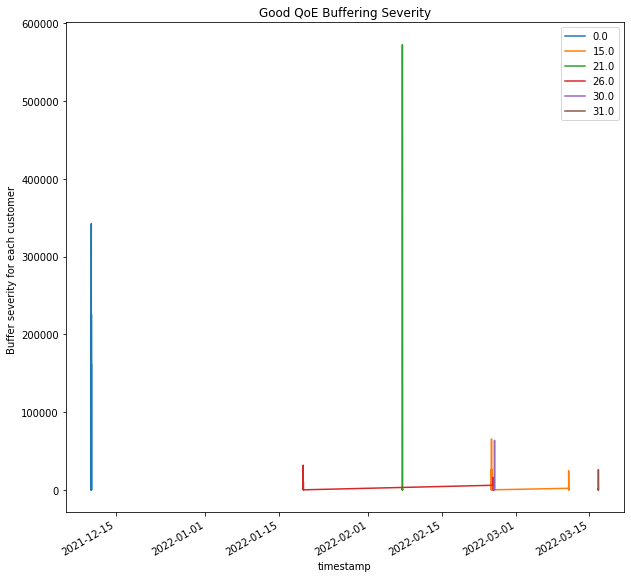

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
df[df['qoe_level'] == 3 ].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer ')
ax.set_title('Good QoE Buffering Severity')

Text(0.5, 1.0, 'Excellent QoE Buffering Severity')

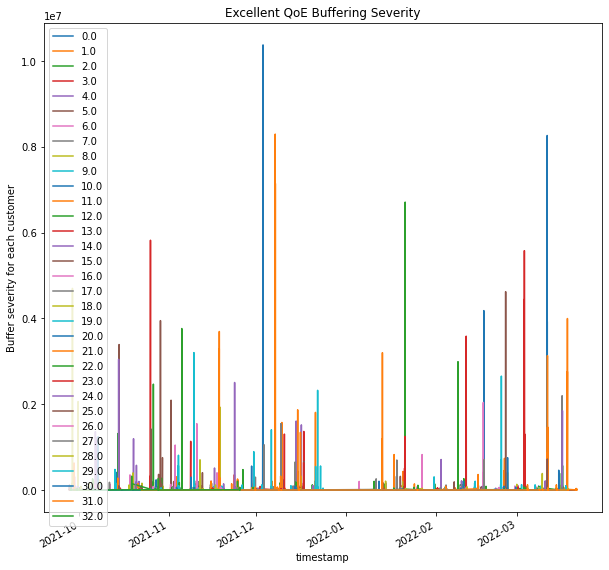

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
df[df['qoe_level'] == 4].groupby('customer_id')['buffer_ms'].plot(ax = ax, legend=True)
ax.set_ylabel('Buffer severity for each customer')
ax.set_title('Excellent QoE Buffering Severity')

## Num of viewers over time that experience the same qoe level

In [ ]:
df['num_of_viewers'] = 0
events = df.groupby('event_id')

for i in events.groups.keys():
  df.loc[df['event_id'] == i,'num_of_viewers'] = df.loc[df['event_id'] == i,'viewer_id'].count()

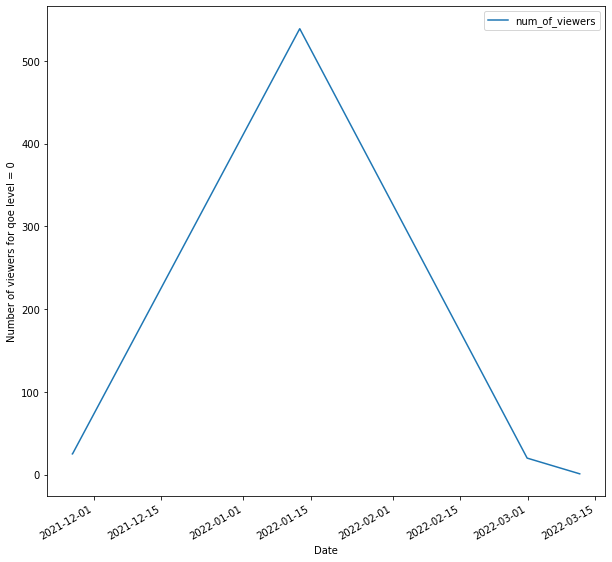

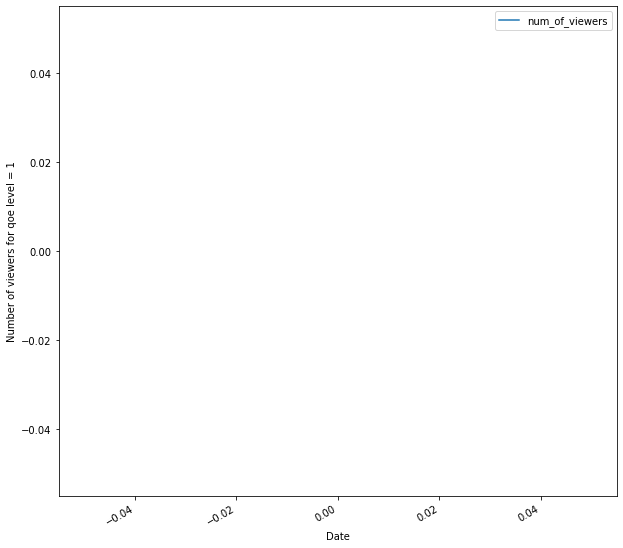

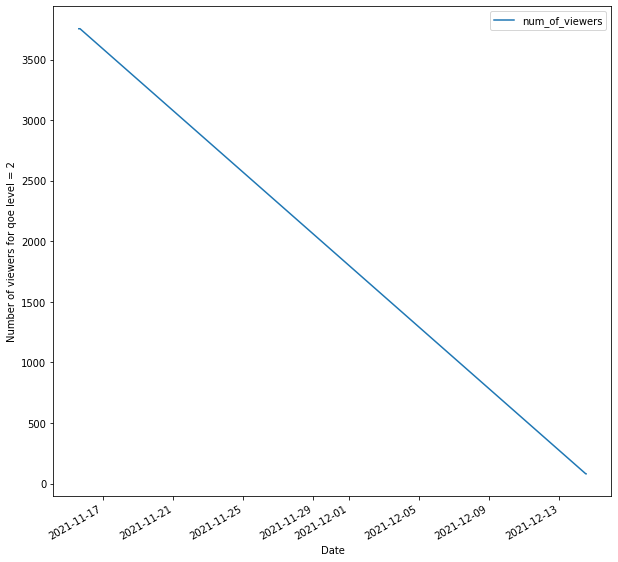

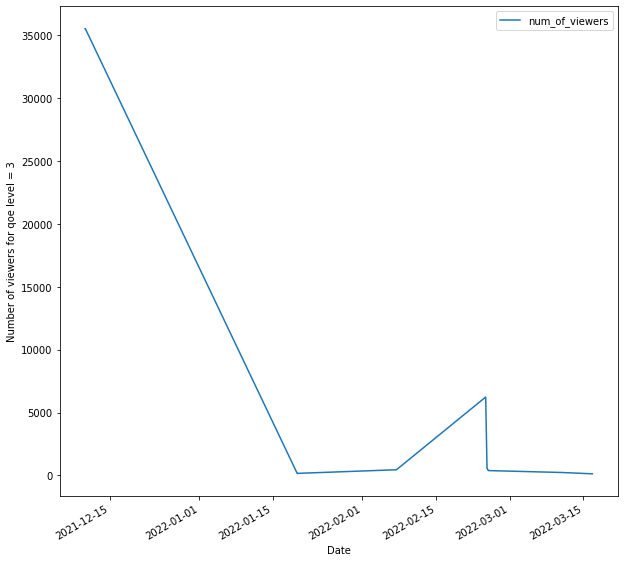

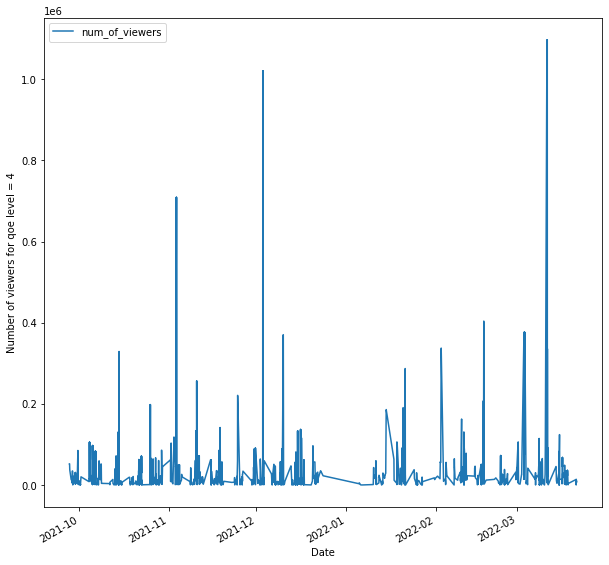

In [ ]:
for i in range(5):
  fig, ax = plt.subplots(figsize=(10,10))
  df.loc[df['qoe_level'] == i,'num_of_viewers'].plot(ax=ax, legend = True)
  ax.set_xlabel('Date')
  ax.set_ylabel('Number of viewers for qoe level = '+ str(i))
  plt.show()

# QoE over time for each customer and the viewers' location type

Text(0, 0.5, 'QoE for each customer')

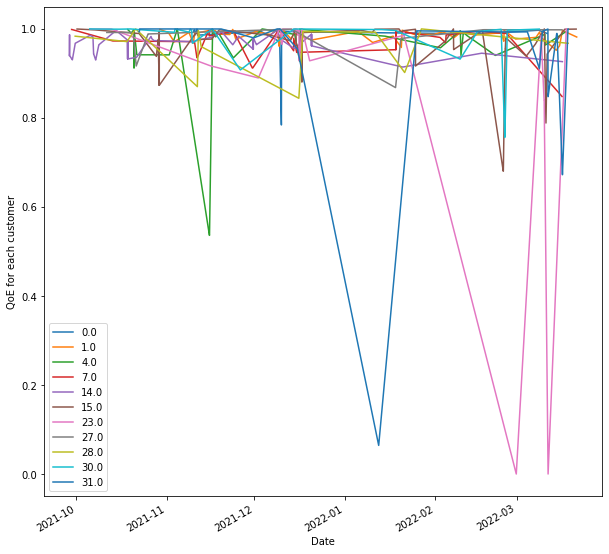

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
final_df[final_df['viewer_type'] == 0].groupby('customer_id')['QoE'].plot(ax = ax, legend=True)

ax.set_xlabel('Date')
ax.set_ylabel('QoE for each customer')

Text(0, 0.5, 'QoE for each customer')

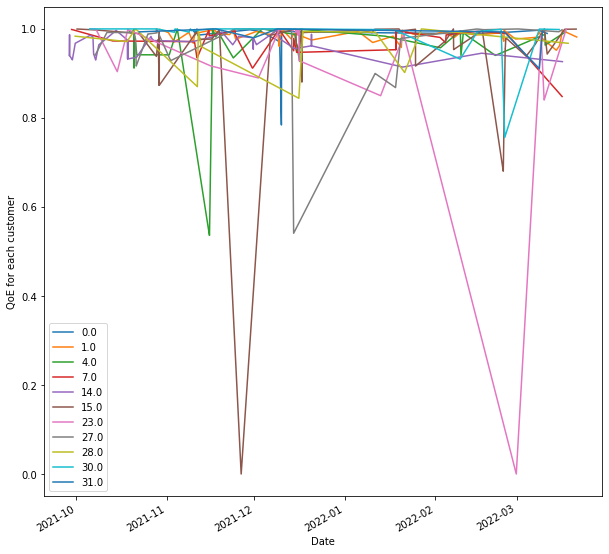

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
final_df[final_df['viewer_type'] == 1].groupby('customer_id')['QoE'].plot(ax = ax, legend=True)

ax.set_xlabel('Date')
ax.set_ylabel('QoE for each customer')

# Correlations between the data points mentioned in Section 2

In [ ]:
df[['buffer_ms','customer_id','qoe_level']].corr()

,buffer_ms,customer_id,qoe_level
buffer_ms,1.000000,0.002461,-0.003249
customer_id,0.002461,1.000000,0.020620
qoe_level,-0.003249,0.020620,1.000000


# Correlations between QoE and the following factors: 
* i) Number of viewers
during the event,
* ii) Day of the event,
* iii) Duration of the event,
* iv) Countries, 
* v) Viewers’ retention (how much time did each viewer participated
in the event)

In [ ]:
df['day_of_event'] = pd.to_datetime(df['timestamp'], unit = 'ms')
df['day_of_event']

timestamp
2021-09-27 17:01:05.906   2021-09-27 17:01:05.906
2021-09-27 17:01:44.254   2021-09-27 17:01:44.254
2021-09-27 17:01:48.299   2021-09-27 17:01:48.299
2021-09-27 17:01:52.510   2021-09-27 17:01:52.510
2021-09-27 17:02:09.231   2021-09-27 17:02:09.231
                                    ...          
2022-03-21 14:17:44.309   2022-03-21 14:17:44.309
2022-03-21 14:17:56.879   2022-03-21 14:17:56.879
2022-03-21 14:18:08.293   2022-03-21 14:18:08.293
2022-03-21 14:18:08.564   2022-03-21 14:18:08.564
2022-03-21 14:18:54.266   2022-03-21 14:18:54.266
Name: day_of_event, Length: 20615370, dtype: datetime64[ns]

In [ ]:
df['day_of_event'] = df['day_of_event'].dt.weekday

In [ ]:
df['day_of_event'].unique()

array([0, 1, 2, 3, 4])

In [ ]:
df['duration_of_event'] = 0

for i in events.groups.keys():
  df.loc[df['event_id'] == i,'duration_of_event'] = round((df.loc[df['event_id'] == i,'timestamp'].max() - df.loc[df['event_id'] == i,'timestamp'].min())*1.67*10**(-5) + 0.5)

df['duration_of_event']

timestamp
2021-09-27 17:01:05.906    69
2021-09-27 17:01:44.254    69
2021-09-27 17:01:48.299    69
2021-09-27 17:01:52.510    69
2021-09-27 17:02:09.231    69
                           ..
2022-03-21 14:17:44.309    23
2022-03-21 14:17:56.879    23
2022-03-21 14:18:08.293    23
2022-03-21 14:18:08.564    23
2022-03-21 14:18:54.266    23
Name: duration_of_event, Length: 20615370, dtype: int64

In [ ]:
a = df.groupby(['event_id', 'viewer_id'])['timestamp'].max()
a

event_id  viewer_id
0.0       151.0        1646997183242
          195.0        1646997196502
          197.0        1646997177986
          202.0        1646997172791
          205.0        1646996418093
                           ...      
730.0     108912.0     1643272244560
731.0     18978.0      1637932491376
732.0     106963.0     1646082385599
          108280.0     1646082579135
733.0     108782.0     1647024880836
Name: timestamp, Length: 183898, dtype: int64

In [ ]:
a = df.groupby(['event_id', 'viewer_id'])['timestamp'].max() - df.groupby(['event_id', 'viewer_id'])['timestamp'].min()

In [ ]:
a =  round(a*1.67*10**(-5) + 0.5)

In [ ]:
b = a.reset_index()

In [ ]:
b = b.rename(columns = {'timestamp': 'viewer_retention'})

In [ ]:
b

,event_id,viewer_id,viewer_retention,num_of_viewers,day_of_event,duration_of_event,QoE,country_id
0,0.0,151.0,194.0,1096821,4,200,0.989831,0.0
1,0.0,195.0,193.0,1096821,4,200,0.989831,0.0
2,0.0,197.0,192.0,1096821,4,200,0.989831,0.0
3,0.0,202.0,194.0,1096821,4,200,0.989831,0.0
4,0.0,205.0,181.0,1096821,4,200,0.989831,0.0
...,...,...,...,...,...,...,...,...
183893,730.0,108912.0,0.0,41,3,10,0.947362,39.0
183894,731.0,18978.0,13.0,25,4,13,0.000000,7.0
183895,732.0,106963.0,7.0,20,0,10,0.000000,1.0
183896,732.0,108280.0,5.0,20,0,10,0.000000,1.0


In [ ]:
a = df.groupby(['event_id', 'viewer_id'])['num_of_viewers'].min()
b['num_of_viewers'] = a.reset_index()['num_of_viewers']

In [ ]:
a = df.groupby(['event_id', 'viewer_id'])['day_of_event'].min()
b['day_of_event'] = a.reset_index()['day_of_event']

In [ ]:
a = df.groupby(['event_id', 'viewer_id'])['duration_of_event'].min()
b['duration_of_event'] = a.reset_index()['duration_of_event']

In [ ]:
a = df.groupby(['event_id', 'viewer_id'])['QoE'].min()
b['QoE'] = a.reset_index()['QoE']

In [ ]:
a = df.groupby(['event_id', 'viewer_id'])['country_id'].min()
b['country_id'] = a.reset_index()['country_id']

In [ ]:
a = df.groupby(['event_id', 'viewer_id'])['day'].min()
b['day'] = a.reset_index()['day']

In [ ]:
a = b.groupby('event_id')

b['num_of_countries'] = 0

for i in a.groups.keys():
  b.loc[b['event_id'] == i, 'num_of_countries'] = b.loc[b['event_id'] == i, 'country_id'].nunique()

In [ ]:
b

,event_id,viewer_id,viewer_retention,num_of_viewers,day_of_event,duration_of_event,QoE,country_id,day,num_of_countries
0,0.0,151.0,194.0,1096821,4,200,0.989831,0.0,2022-03-11,4
1,0.0,195.0,193.0,1096821,4,200,0.989831,0.0,2022-03-11,4
2,0.0,197.0,192.0,1096821,4,200,0.989831,0.0,2022-03-11,4
3,0.0,202.0,194.0,1096821,4,200,0.989831,0.0,2022-03-11,4
4,0.0,205.0,181.0,1096821,4,200,0.989831,0.0,2022-03-11,4
...,...,...,...,...,...,...,...,...,...,...
183893,730.0,108912.0,0.0,41,3,10,0.947362,39.0,2022-01-27,1
183894,731.0,18978.0,13.0,25,4,13,0.000000,7.0,2021-11-26,1
183895,732.0,106963.0,7.0,20,0,10,0.000000,1.0,2022-02-28,1
183896,732.0,108280.0,5.0,20,0,10,0.000000,1.0,2022-02-28,1


In [ ]:
b[['QoE','num_of_viewers']].corr()

,QoE,num_of_viewers
QoE,1.000000,0.071984
num_of_viewers,0.071984,1.000000


In [ ]:
b[['QoE','day_of_event']].corr()

,QoE,day_of_event
QoE,1.000000,0.025843
day_of_event,0.025843,1.000000


In [ ]:
b[['QoE','duration_of_event']].corr()

,QoE,duration_of_event
QoE,1.000000,0.085223
duration_of_event,0.085223,1.000000


In [ ]:
df[['QoE','country_id']].corr()

,QoE,country_id
QoE,1.000000,-0.152027
country_id,-0.152027,1.000000


In [ ]:
b[['QoE','num_of_countries']].corr()

,QoE,num_of_countries
QoE,1.000000,-0.116343
num_of_countries,-0.116343,1.000000


In [ ]:
b[['QoE','viewer_retention']].corr()

,QoE,viewer_retention
QoE,1.000000,0.079876
viewer_retention,0.079876,1.000000


# Creating df for the model


In [ ]:
d = df.groupby(['day','event_id'])['timestamp'].min()
df_final = d.reset_index()

d = df.groupby(['day','event_id'])['customer_id'].min()
df_final['customer_id'] = d.reset_index()['customer_id']

d = df.groupby(['day','event_id'])['viewer_type'].mean()
df_final['viewer_type'] = d.reset_index()['viewer_type']

d = df.groupby(['day','event_id'])['buffer_ms'].sum()
df_final['buffer_event'] = d.reset_index()['buffer_ms']

d = df.groupby(['day','event_id'])['Eng'].min()
df_final['Eng'] = d.reset_index()['Eng']

d = df.groupby(['day','event_id'])['QoE'].min()
df_final['QoE'] = d.reset_index()['QoE']

df_final['timestamp'] = pd.to_datetime(df_final['timestamp'],unit = 'ms')
df_final = df_final.set_index(df_final['timestamp'])
df_final

,day,event_id,timestamp,customer_id,viewer_type,buffer_event,Eng,QoE
timestamp,,,,,,,,
2021-09-27 17:00:46.726,2021-09-27,107.0,2021-09-27 17:00:46.726,5.0,0.687210,1888140,0.488534,0.995236
2021-09-27 19:01:10.982,2021-09-27,141.0,2021-09-27 19:01:10.982,5.0,0.710363,3165101,0.429781,0.979183
2021-09-28 16:32:03.360,2021-09-28,149.0,2021-09-28 16:32:03.360,8.0,0.700836,15217745,0.458721,0.946909
2021-09-28 06:30:48.255,2021-09-28,331.0,2021-09-28 06:30:48.255,32.0,0.065478,686432,0.549757,0.998949
2021-09-28 14:04:10.962,2021-09-28,359.0,2021-09-28 14:04:10.962,16.0,0.201881,397280,0.502131,0.997397
...,...,...,...,...,...,...,...,...
2022-03-18 00:00:34.374,2022-03-18,682.0,2022-03-18 00:00:34.374,23.0,0.821501,5699,0.326383,0.999999
2022-03-21 09:00:05.543,2022-03-21,317.0,2022-03-21 09:00:05.543,21.0,0.199956,2004082,0.547751,0.990840
2022-03-21 14:01:13.917,2022-03-21,401.0,2022-03-21 14:01:13.917,1.0,0.879111,1245003,0.260244,0.981789


In [ ]:
d = b.groupby('event_id')

df_final['num_of_viewers'] = 0

for i in d.groups.keys():
  df_final.loc[df_final['event_id'] == i, 'num_of_viewers'] = b.loc[b['event_id'] == i, 'num_of_viewers'].unique()

In [ ]:
d = b.groupby('event_id')

df_final['num_of_countries'] = 0

for i in d.groups.keys():
  df_final.loc[df_final['event_id'] == i, 'num_of_countries'] = b.loc[b['event_id'] == i, 'num_of_countries'].unique()

In [ ]:
d = df.groupby('event_id')

df_final['num_of_cities'] = 0

for i in d.groups.keys():
  df_final.loc[df_final['event_id'] == i, 'num_of_cities'] = df.loc[df['event_id'] == i, 'city_id'].nunique()

In [ ]:
d = b.groupby('event_id')

df_final['day_of_event'] = 0

for i in d.groups.keys():
  df_final.loc[df_final['event_id'] == i, 'day_of_event'] = b.loc[b['event_id'] == i, 'day_of_event'].unique()

In [ ]:
d = b.groupby('event_id')

df_final['duration_of_event'] = 0

for i in d.groups.keys():
  df_final.loc[df_final['event_id'] == i, 'duration_of_event'] = b.loc[b['event_id'] == i, 'duration_of_event'].unique()

In [ ]:
d = b.groupby('event_id')

df_final['viewer_retention'] = 0

for i in d.groups.keys():
  df_final.loc[df_final['event_id'] == i, 'viewer_retention'] = b.loc[b['event_id'] == i, 'viewer_retention'].mean()

In [ ]:
df_final

,day,event_id,timestamp,customer_id,viewer_type,buffer_event,Eng,QoE,num_of_viewers,num_of_countries,num_of_cities,day_of_event,duration_of_event,viewer_retention
timestamp,,,,,,,,,,,,,,
2021-09-27 17:00:46.726,2021-09-27,107.0,2021-09-27 17:00:46.726,5.0,0.687210,1888140,0.488534,0.995236,52182,1,50,0,69,53.245509
2021-09-27 19:01:10.982,2021-09-27,141.0,2021-09-27 19:01:10.982,5.0,0.710363,3165101,0.429781,0.979183,37326,1,54,0,46,31.926174
2021-09-28 16:32:03.360,2021-09-28,149.0,2021-09-28 16:32:03.360,8.0,0.700836,15217745,0.458721,0.946909,34670,3,56,1,123,62.232639
2021-09-28 06:30:48.255,2021-09-28,331.0,2021-09-28 06:30:48.255,32.0,0.065478,686432,0.549757,0.998949,13073,6,38,1,119,95.383562
2021-09-28 14:04:10.962,2021-09-28,359.0,2021-09-28 14:04:10.962,16.0,0.201881,397280,0.502131,0.997397,10739,4,82,1,61,46.870690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-18 00:00:34.374,2022-03-18,682.0,2022-03-18 00:00:34.374,23.0,0.821501,5699,0.326383,0.999999,493,1,5,4,51,41.500000
2022-03-21 09:00:05.543,2022-03-21,317.0,2022-03-21 09:00:05.543,21.0,0.199956,2004082,0.547751,0.990840,13723,13,37,0,113,90.271605
2022-03-21 14:01:13.917,2022-03-21,401.0,2022-03-21 14:01:13.917,1.0,0.879111,1245003,0.260244,0.981789,9182,3,44,0,23,15.926667


In [ ]:
from google.colab import files

df_final.to_csv('df.csv', encoding = 'utf-8-sig') 
files.download('df.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>